### STAT 451 Group 8 Project Proposal 
Group Members: Julia Woods, Alena Zheng, Chenxi Dong, Yuhan Li, Syasya Zulkifli

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                     GridSearchCV, RandomizedSearchCV)
from scipy.stats import uniform
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, RocCurveDisplay)

#### Data Reading

In [2]:
df_raw = pd.read_csv("startup data.csv")
df = df_raw[['labels','relationships', 'milestones',  'is_top500', 'funding_rounds', 'is_otherstate', 'is_MA', 'is_CA', 'is_NY', 
'is_TX', 'age_first_funding_year', 'age_last_funding_year', 'has_angel', 'is_enterprise', 'is_ecommerce', 'is_software',
'is_web', 'is_mobile', 'is_advertising', 'is_gamesvideo', 'is_biotech']]


#### Data Description
We found out dataset on Kaggle : https://www.kaggle.com/datasets/manishkc06/startup-success-prediction/discussion/188201
The dataset is titled Startup Success Prediction. It has 49 columns and 923 rows. 
We removed some variables: *unnamed:0 , unnamed: 6, state_code.1, latitude, longitude, id, first_funding_year, last_funding year, category_code, state_code, object_id*, city, name, is_top500, closed_at, has_roundA, has_roundB, has_roundC, has_roundD 

#### Questions
 
1.Is it possible to predict if a startup is successful based on different characteristics like location, amount of funding, and type of industry? 

2.Which machine learning classification method is the most accurate at classifying if a startup is successful or not?

3.What are some general trends in this dataset? Are there certain locations or industries that create the most successful startups? 


####  Methods

We will train and test three classification methods: logistic regression, decision tree, and support vector machine. We will evaluate their accuracy and find which is the most accurate at predicting if a startup will be successful. The data table defines success as if a company has been acquired. There is a column with binary values that we can use as our y values. We will divide the dataset into training and test sections. Finally, we will create visualizations using matplotlib to highlight trends in the dataset. 

#### Variables
- is_CA, is_NY, is_MA, is_TX, is_otherstate - (categorical - state that startup located)    
- founded_at - (quantitative- date for the start up founded)
- age_first_funding_year, age_last_funding_year - (quantitative - age of the startup when receiving first and last funding)
- age_first_milestone_year, age_last_milestone_year - (quantitative - age of the first and last tracks progress as a startup grows and implements their plan)
- relationships - (quantitative - number of business relationships and connections)
- funding_rounds - (quantitative - number of rounds of funding the startup has received) 
- funding_total_usd - (quantitative - amount of funding the startup has received in USD)
- milestones - (quantitative - tracks progress as a startup grows and implements their plan)
- is_software, is_gamesvideo, is_enterprise, is_advertising, is_ecommerce, is_consulting, is_biotech, is_othercategory - (categorical - determine the type of industry) 
- has_VC - (categorical - whether the company has Venture capital to support startup)
- has_angel - (categorical - whether the company has private individual who directly invests part of their assets)

#### Response Variable
- labels - (categorical - success/ not success)

The proportion of 1s in the label column which illustrates the proportion of successful startups is:

# Data Cleaning

Look for missing values and input with zeros:

# Model Comparison

In [3]:
#split into train/test 
X = df.loc[:, df.columns != "labels"]
y = df['labels']
# split 80% training data, 20% "_tmp" for validation & test
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=.2,
                                                  random_state=0, stratify=y)
# of remaining 20%, split in half to get 10% validation, 10% test
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0, stratify=y_tmp)

In [30]:
#train and test three classification methods: logistic regression, decision tree, and support vector machine

#use grid search 
#hyperparameters: 
#logistic regression-

best_classifier_index=-1
best_accuracy=-np.Inf
best_classifier=None
best_parameters=None

classifiers = [svm.SVC(), linear_model.LogisticRegression(), DecisionTreeClassifier()]
parameters = [{'kernel':('linear', 'rbf'), 'C':[.01,1, 1000]}, {'max_iter':[3000], 'C':[.01,1, 1000]}, {'criterion':['entropy'], 'max_depth':[1,3,5,7]}]

for i in range(0,3):
    clf = GridSearchCV(classifiers[i], parameters[i])
    clf.fit(X_train, y_train)
    score= clf.score(X_valid, y_valid)
    params= clf.best_params_
    if score > best_accuracy:
        best_accuracy=score
        best_classifier_index=i
        best_parameters= params
        best_classifier=clf 
        
print(f'The best classifier is {best_classifier} with parameters {best_parameters}.')

The best classifier is GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 1, 1000], 'kernel': ('linear', 'rbf')}) with parameters {'C': 1, 'kernel': 'rbf'}.


In [31]:
best_accuracy

0.782608695652174

In [5]:
# ramdom search

best_classifier_index=-1
best_accuracy=-np.Inf
best_classifier=None
best_parameters=None
rng = np.random.default_rng(seed=0)
distributions = [{'kernel':('linear', 'rbf'), 'C': uniform(loc=0, scale=1000)}, {'max_iter':[3000], 'C': uniform(loc=0, scale=1000)}, {'criterion':['entropy'], 'max_depth':[1,3,5,7]}]
for i in range(len(classifiers)):
    clf = RandomizedSearchCV(classifiers[i], param_distributions=distributions[i], n_iter=10)
    clf.fit(X_train, y_train)
    score= clf.score(X_valid, y_valid)
    params= clf.best_params_
    if score > best_accuracy:
        best_accuracy=score
        best_classifier_index=i
        best_parameters= params
        best_classifier=clf 
        
print(f'The best classifier is {best_classifier} with parameters {best_parameters}.')

The best classifier is RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16948c730>,
                                        'kernel': ('linear', 'rbf')}) with parameters {'C': 16.38695945582247, 'kernel': 'rbf'}.


/Users/dongchenxi/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [6]:
#evaluate chosen model on data 
print(f' My score from my best classifier and hyperparameters are {best_classifier.score(X_test, y_test):.3}')

 My score from my best classifier and hyperparameters are 0.785


## Logistic Regression

The logistic regression model with C = 0.01 has a training score=0.728
and confusion matrix is[[20 13]
 [ 4 56]]
The logistic regression model with C = 1 has a training score=0.696
and confusion matrix is[[20 13]
 [ 8 52]]
The logistic regression model with C = 1000 has a training score=0.685
and confusion matrix is[[20 13]
 [ 9 51]]


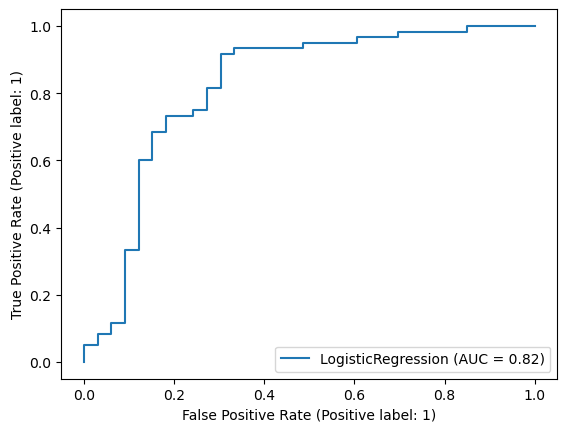

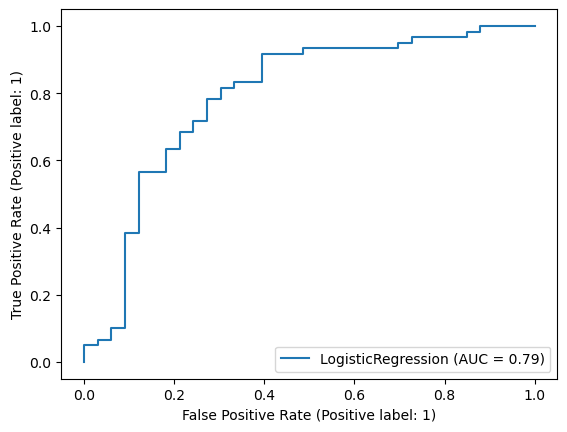

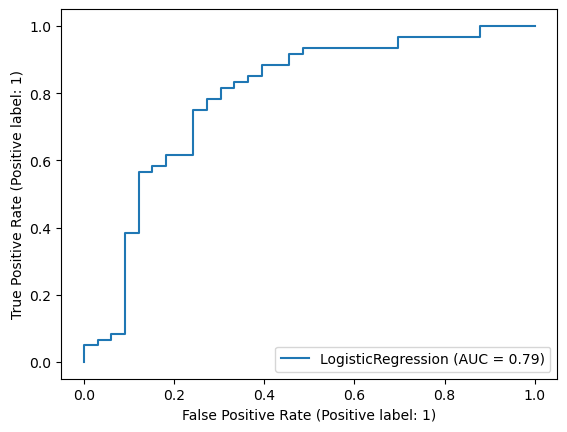

In [23]:
#logistic regression
best_classifier=None
best_accuracy=-np.Inf
best_C=None

C_vals = [.01,1,1000]
scores_logis = {}
for i in range(len(C_vals)):
    log_model = linear_model.LogisticRegression(max_iter=3000, C=C_vals[i])
    log_model.fit(X_train, y_train)
    score= log_model.score(X_valid, y_valid)
    scores_logis['logistic regression with C='+str(C_vals[i])] = round(score,3)
    print(f'The logistic regression model with C = {C_vals[i]} has a training score={score:.3}')
    if score > best_accuracy:
        best_classifier= log_model
        best_C = C_vals[i]
        best_accuracy= score
    y_hat = log_model.predict(X_test)
    print(f'and confusion matrix is{confusion_matrix(y_true = y_test, y_pred = y_hat)}')
    RocCurveDisplay.from_estimator(log_model, X_test, y_test) 

In [24]:
scores_logis

{'logistic regression with C=0.01': 0.728,
 'logistic regression with C=1': 0.696,
 'logistic regression with C=1000': 0.685}

## Support Vector Machine

In [16]:

svc1 = svm.SVC(kernel="linear", C=0.01)
svc2 = svm.SVC(kernel="linear", C=1)
svc3 = svm.SVC(kernel="linear", C=1000)
svc4 = svm.SVC(kernel='rbf', C=0.01)
svc5 = svm.SVC(kernel='rbf', C=1)
svc6 = svm.SVC(kernel='rbf', C=1000)
svc1.fit(X_train, y_train)
svc2.fit(X_train, y_train)
svc3.fit(X_train, y_train)
svc4.fit(X_train, y_train)
svc5.fit(X_train, y_train)
svc6.fit(X_train, y_train)
               
print(f'svc(kernel="linear", C=0.01)={svc1.score(X_valid, y_valid):.3}')
print(f'svc(kernel="linear", C=1)={svc2.score(X_valid, y_valid):.3}')
print(f'svc(kernel="linear", C=1000)={svc3.score(X_valid, y_valid):.3}')
print(f'svc(kernel="rbf", C=0.01)={svc4.score(X_valid, y_valid):.3}')
print(f'svc(kernel="rbf", C=1)={svc5.score(X_valid, y_valid):.3}')
print(f'svc(kernel="rbf", C=1000)={svc6.score(X_valid, y_valid):.3}')


svc(kernel="linear", C=0.01)=0.739
svc(kernel="linear", C=1)=0.696
svc(kernel="linear", C=1000)=0.707
svc(kernel="rbf", C=0.01)=0.652
svc(kernel="rbf", C=1)=0.783
svc(kernel="rbf", C=1000)=0.663


and confusion matrix is[[18 15]
 [ 3 57]]


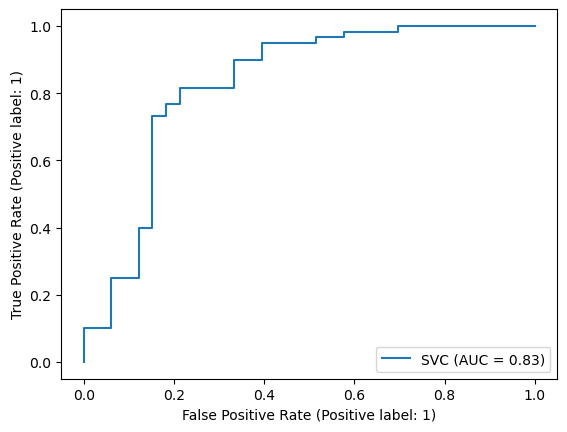

In [29]:
svm_model = svm.SVC(kernel='rbf', C=1)
svm_model.fit(X_train, y_train)
y_hat = svm_model.predict(X_test)
print(f'and confusion matrix is{confusion_matrix(y_true = y_test, y_pred = y_hat)}')
RocCurveDisplay.from_estimator(svm_model, X_test, y_test) 

## Decision Tree

The decision tree model with max depth = 1 has a training score=0.717391304347826
and confusion matrix is[[16 17]
 [ 2 58]]
The decision tree model with max depth = 3 has a training score=0.6956521739130435
and confusion matrix is[[14 19]
 [ 2 58]]
The decision tree model with max depth = 5 has a training score=0.7065217391304348
and confusion matrix is[[15 18]
 [ 2 58]]
The decision tree model with max depth = 7 has a training score=0.6956521739130435
and confusion matrix is[[17 16]
 [ 5 55]]


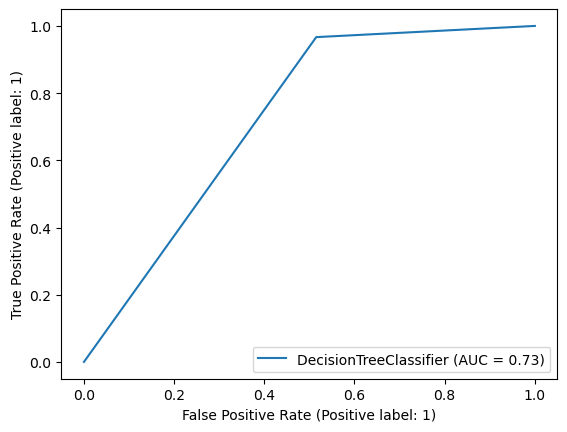

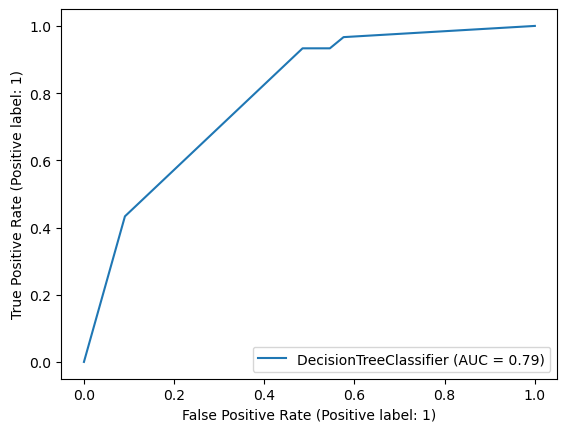

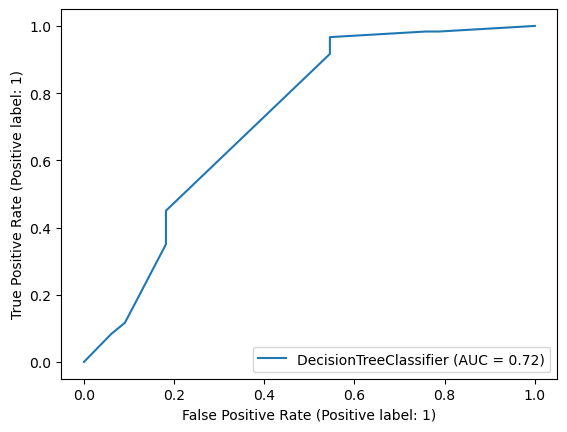

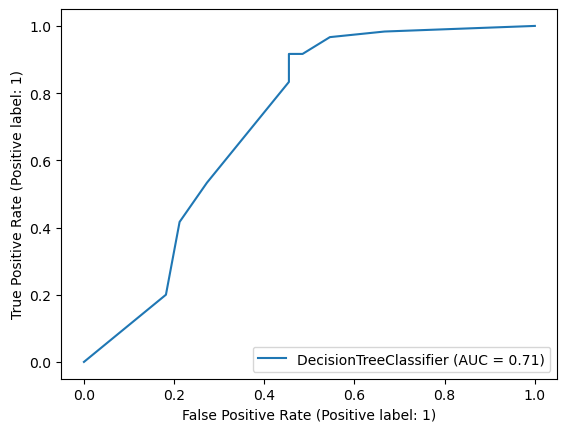

In [25]:
#decision tree
max_depth=[1,3,5,7]
dtc_best_classifier=None
dtc_best_accuracy=-np.Inf
dtc_best_depth=None
scores ={}
for i in range(len(max_depth)):
    dtc_model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth[i])
    dtc_model.fit(X_train, y_train)
    score=dtc_model.score(X_valid, y_valid)
    scores['criterion="entropy", max_depth='+str(max_depth[i])]=round(score,3)
    print(f'The decision tree model with max depth = {max_depth[i]} has a training score={dtc_model.score(X_valid, y_valid)}')
    if score > dtc_best_accuracy:
        dtc_best_classifier= dtc_model
        dtc_best_depth = max_depth[i]
        dtc_best_accuracy= score
    y_hat = dtc_model.predict(X_test)
    print(f'and confusion matrix is{confusion_matrix(y_true = y_test, y_pred = y_hat)}')
    RocCurveDisplay.from_estimator(dtc_model, X_test, y_test) 
    

In [26]:
scores

{'criterion="entropy", max_depth=1': 0.717,
 'criterion="entropy", max_depth=3': 0.696,
 'criterion="entropy", max_depth=5': 0.707,
 'criterion="entropy", max_depth=7': 0.696}

# Final Comparison and Evaluation of Models

In [ ]:
# to do: evaluate one model from each type on test data and conclude best model 

# Data Visualizations

In [ ]:
#division of rest of work:

#to do:
# part 1 - split btw yuhan and chenxi 
#finish creating each model
#report score of test data and then use that to decide the best
#make confusion matrix for each model


#visualizations - rest of us 
#try to do a map - julia
#graph of industries and how many successful startups -
#generate a table of outliers - alena 

